# Data Science Job Salaries

In [1]:
%pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ruchi798/data-science-job-salaries")

print("Path to dataset files:", path)


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
/root/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Path to dataset files: /root/.cache/kagglehub/datasets/ruchi798/data-science-job-salaries/versions/1


In [2]:
# imports

import pandas as pd

In [3]:
df = pd.read_csv(path + "/ds_salaries.csv")
df

Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD         260000   
2             Big Data Engineer   85000             GBP         109024   
3          Product Data Analyst   20000             USD          20000   
4     Machine Learning Engineer  150000             USD         150000   
..                          ...     ...             ...            ...   
602               Data Engineer  154000             USD         154000   
603               Data Engineer  126000             USD         126000   
604                Data Analyst  129000             USD         129000   
605                Data Analyst  150000             USD         150000   
606                AI Scientist  200000             USD         200000   

    employee_residence  remote_ratio company_location company_size  
0                   DE             0               DE            L  
1                   JP             0               JP            S  
2                   GB            50               GB            M  
3                   HN             0               HN            S  
4                   US            50               US            L  
..                 ...           ...              ...          ...  
602                 US           100               US            M  
603                 US           100               US            M  
604                 US             0               US            M  
605                 US           100               US            M  
606                 IN           100               US            L  

[607 rows x 12 columns]

In [4]:
# remove later, testing
job_title_avg_salary_df = df.groupby(["job_title"])["salary_in_usd"].mean().sort_values(ascending=False)
job_title_avg_salary_df

job_title
Data Analytics Lead                         405000.000000
Principal Data Engineer                     328333.333333
Financial Data Analyst                      275000.000000
Principal Data Scientist                    215242.428571
Director of Data Science                    195074.000000
Data Architect                              177873.909091
Applied Data Scientist                      175655.000000
Analytics Engineer                          175000.000000
Data Specialist                             165000.000000
Head of Data                                160162.600000
Machine Learning Scientist                  158412.500000
Data Science Manager                        158328.500000
Director of Data Engineering                156738.000000
Head of Data Science                        146718.750000
Applied Machine Learning Scientist          142068.750000
Lead Data Engineer                          139724.500000
Data Analytics Manager                      127134.285714
Clou

> You are a data scientist tasked with performing a thorough Exploratory Data Analysis (EDA) on a salary dataset with the following columns:

- work_year: The year the salary was paid
- experience_level: EN (Entry-level), MI (Mid-level), SE (Senior-level), EX (Executive-level)
- employment_type: PT (Part-time), FT (Full-time), CT (Contract), FL (Freelance)
- job_title: Job title
- salary: Original salary
- salary_currency: Currency code
- salary_in_usd: Salary converted to USD
- employee_residence: Country code of the employee
- remote_ratio: 0 (On-site), 50 (Hybrid), 100 (Remote)
- company_location: Country code of the employer
- company_size: S (<50), M (50–250), L (>250 employees)

Write a Python script using pandas, matplotlib, seaborn, and optionally plotly for interactivity. Your goals are:

1. Load the data, check for missing values, data types, and perform basic cleaning.
2. Generate high-level summaries:
   - Number of rows and unique values per column.
   - Most common job titles and their average salary.
3. Create histograms and boxplots:
   - Distribution of `salary_in_usd`
   - Boxplot of salary by `experience_level`, `employment_type`, `remote_ratio`, `company_size`
4. Perform group-wise aggregations:
   - Mean and median salary by `job_title`, `experience_level`, and `company_size`
   - Show top 10 highest-paid roles with their average salaries
5. Explore categorical relationships:
   - Use countplots and bar charts to compare salary distributions across:
     - Experience level vs employment type
     - Remote ratio vs job title
     - Company size vs salary
6. Compare remote vs non-remote jobs:
   - T-test or boxplot comparing salary distributions between remote (100) and on-site (0)
   - Show effect of remote_ratio on salary
7. Analyze salary trends over time:
   - Line plot of average salary by `work_year`
   - CI error bars or standard deviation over years
8. Optional: World map showing average salary by `employee_residence` or `company_location`
   - Use plotly or geopandas for choropleth
9. Identify potential outliers or anomalies
   - Use IQR or z-score to detect extreme salaries
10. Generate 3–5 key insights from your findings
   - E.g., "Executives earn 3x more than Mid-level on average", or "Remote roles pay 10% higher than onsite"

Make sure to label all plots clearly, and print summaries with interpretations. Use `seaborn`, `matplotlib`, and optionally `scipy.stats` for statistical tests. Output should be well-commented and easy to follow. Make sure that your EDA has good "Storytelling" aspects and can answer the ultimate question of "So, what?"

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Basic data info
print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nUnique Values per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

Dataset Shape: (607, 12)

Data Types:
Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

Missing Values:
Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Unique Values per Column:
Unnamed: 0: 607
work_year: 3
experience_level: 4
employment_type: 4
job_title: 50
salary: 272
salary_currency: 17
salary_in_usd: 369
employee_residence: 57
remote_ratio: 3
company_location: 50
company_size: 3


In [6]:
# Most common job titles and their average salaries
job_counts = df['job_title'].value_counts().head(10)
job_avg_salary = df.groupby('job_title')['salary_in_usd'].mean()

print("Top 10 Most Common Job Titles:")
for job in job_counts.index:
    count = job_counts[job]
    avg_salary = job_avg_salary[job]
    print(f"{job}: {count} positions, Average Salary: ${avg_salary:,.2f}")

Top 10 Most Common Job Titles:
Data Scientist: 143 positions, Average Salary: $108,187.83
Data Engineer: 132 positions, Average Salary: $112,725.00
Data Analyst: 97 positions, Average Salary: $92,893.06
Machine Learning Engineer: 41 positions, Average Salary: $104,880.15
Research Scientist: 16 positions, Average Salary: $109,019.50
Data Science Manager: 12 positions, Average Salary: $158,328.50
Data Architect: 11 positions, Average Salary: $177,873.91
Machine Learning Scientist: 8 positions, Average Salary: $158,412.50
Big Data Engineer: 8 positions, Average Salary: $51,974.00
Director of Data Science: 7 positions, Average Salary: $195,074.00


/tmp/ipykernel_601/1269575588.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


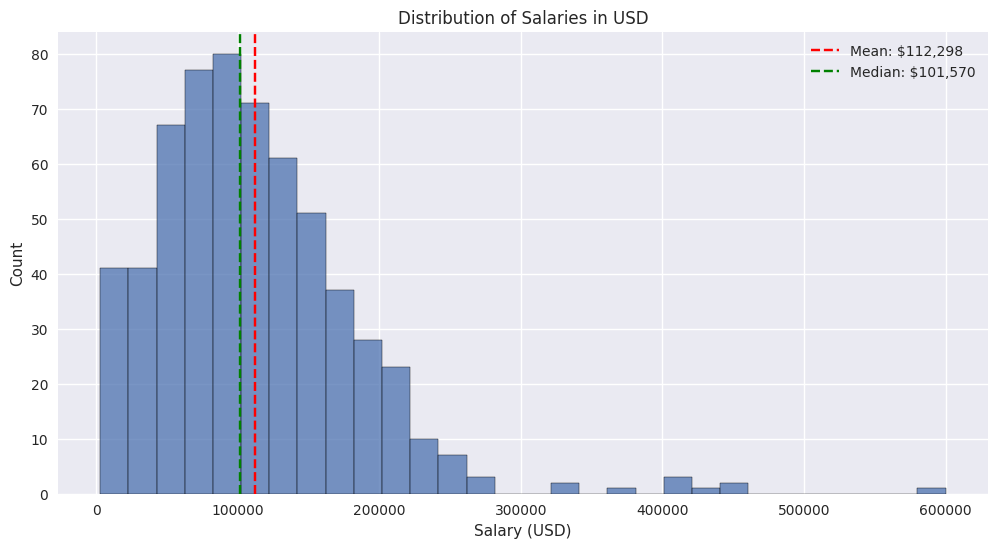

In [7]:
# Set up the plotting style
plt.style.use('seaborn')
plt.figure(figsize=(12, 6))

# Create histogram of salary distribution
sns.histplot(data=df, x='salary_in_usd', bins=30)
plt.title('Distribution of Salaries in USD')
plt.xlabel('Salary (USD)')
plt.ylabel('Count')

# Add vertical line for mean and median
plt.axvline(df['salary_in_usd'].mean(), color='red', linestyle='--', label=f'Mean: ${df["salary_in_usd"].mean():,.0f}')
plt.axvline(df['salary_in_usd'].median(), color='green', linestyle='--', label=f'Median: ${df["salary_in_usd"].median():,.0f}')
plt.legend()
plt.show()

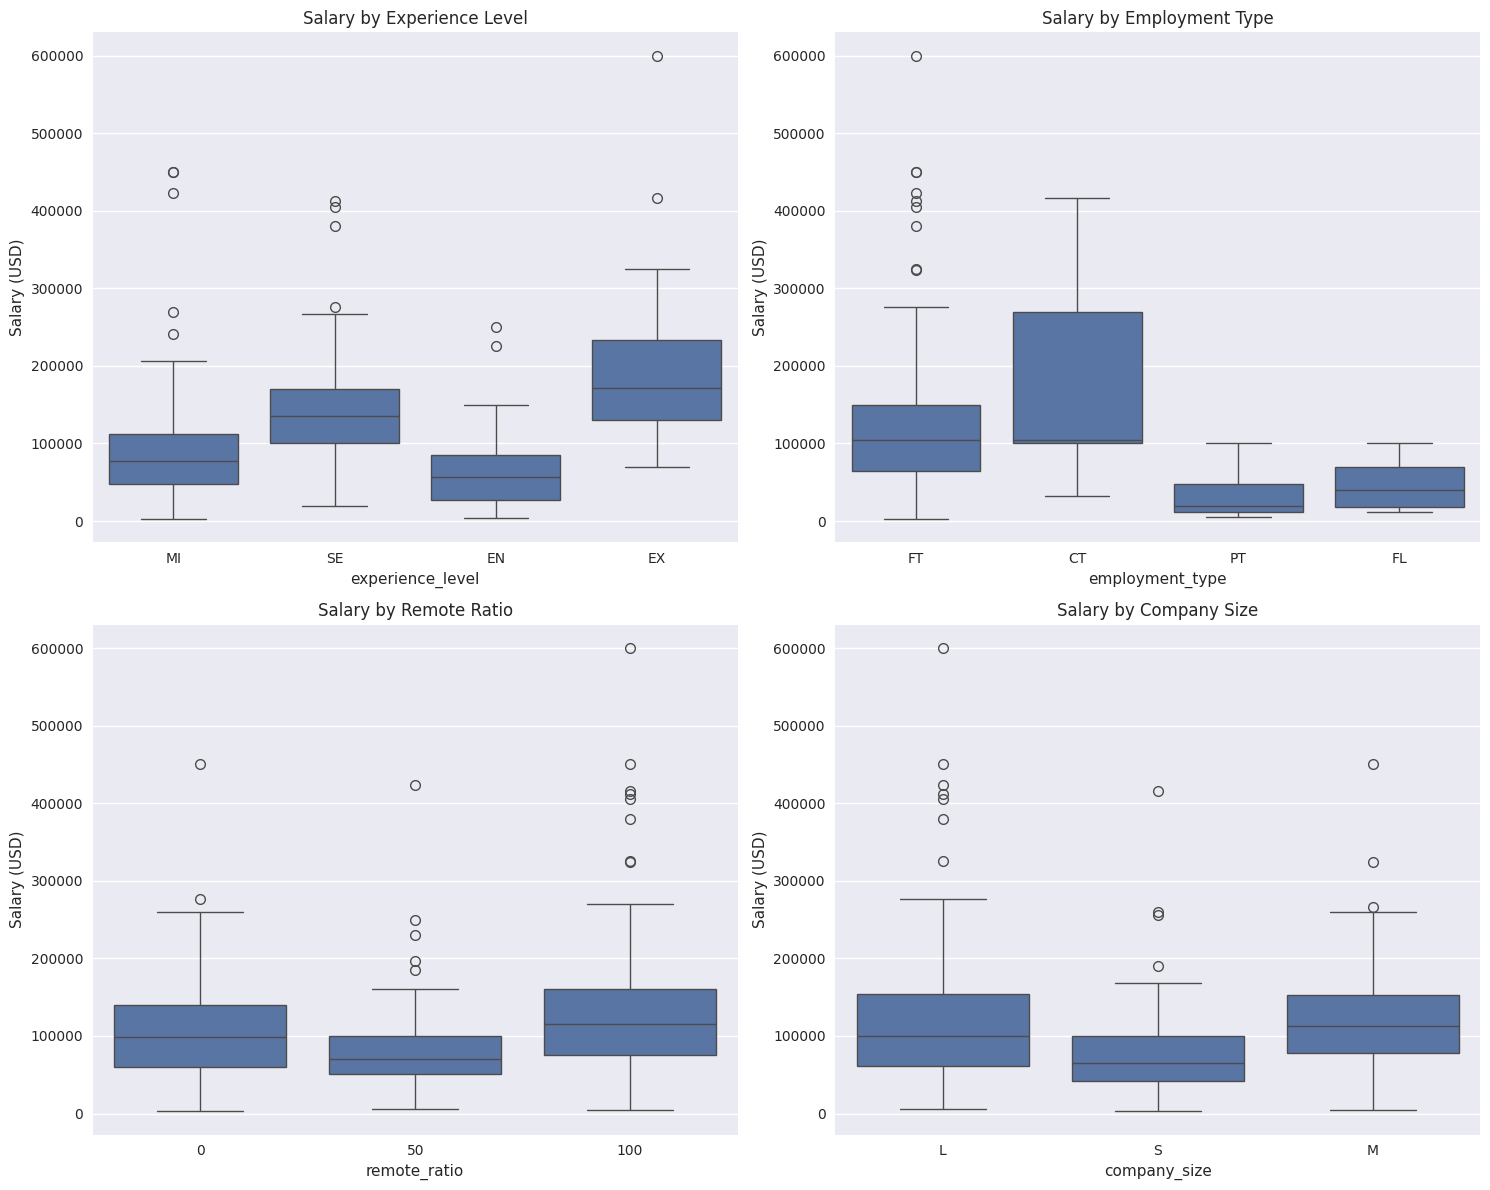

In [8]:
# Create boxplots for categorical variables
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

sns.boxplot(data=df, x='experience_level', y='salary_in_usd', ax=ax1)
ax1.set_title('Salary by Experience Level')
ax1.set_ylabel('Salary (USD)')

sns.boxplot(data=df, x='employment_type', y='salary_in_usd', ax=ax2)
ax2.set_title('Salary by Employment Type')
ax2.set_ylabel('Salary (USD)')

sns.boxplot(data=df, x='remote_ratio', y='salary_in_usd', ax=ax3)
ax3.set_title('Salary by Remote Ratio')
ax3.set_ylabel('Salary (USD)')

sns.boxplot(data=df, x='company_size', y='salary_in_usd', ax=ax4)
ax4.set_title('Salary by Company Size')
ax4.set_ylabel('Salary (USD)')

plt.tight_layout()
plt.show()

In [9]:
# Group-wise aggregations
print("Salary Statistics by Experience Level:")
exp_stats = df.groupby('experience_level')['salary_in_usd'].agg(['mean', 'median', 'count']).round(2)
print(exp_stats)

print("\nSalary Statistics by Company Size:")
size_stats = df.groupby('company_size')['salary_in_usd'].agg(['mean', 'median', 'count']).round(2)
print(size_stats)

print("\nTop 10 Highest Paid Roles (by average salary):")
top_roles = df.groupby('job_title')['salary_in_usd'].agg(['mean', 'count']).sort_values('mean', ascending=False).head(10)
print(top_roles)

Salary Statistics by Experience Level:
                       mean    median  count
experience_level                            
EN                 61643.32   56500.0     88
EX                199392.04  171437.5     26
MI                 87996.06   76940.0    213
SE                138617.29  135500.0    280

Salary Statistics by Company Size:
                   mean    median  count
company_size                            
L             119242.99  100000.0    198
M             116905.47  113188.0    326
S              77632.67   65000.0     83

Top 10 Highest Paid Roles (by average salary):
                                   mean  count
job_title                                     
Data Analytics Lead       405000.000000      1
Principal Data Engineer   328333.333333      3
Financial Data Analyst    275000.000000      2
Principal Data Scientist  215242.428571      7
Director of Data Science  195074.000000      7
Data Architect            177873.909091     11
Applied Data Scientist    

In [10]:
# Compare remote vs non-remote jobs using t-test
remote_salaries = df[df['remote_ratio'] == 100]['salary_in_usd']
onsite_salaries = df[df['remote_ratio'] == 0]['salary_in_usd']

t_stat, p_value = stats.ttest_ind(remote_salaries, onsite_salaries)

print("T-test Results for Remote vs On-site Salaries:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print("\nMean Salaries:")
print(f"Remote: ${remote_salaries.mean():,.2f}")
print(f"On-site: ${onsite_salaries.mean():,.2f}")
print(f"Difference: ${remote_salaries.mean() - onsite_salaries.mean():,.2f}")

# Visualize the comparison
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['remote_ratio'].isin([0, 100])], 
            x='remote_ratio', y='salary_in_usd')
plt.title('Salary Distribution: Remote vs On-site')
plt.xlabel('Remote Ratio (0=On-site, 100=Remote)')
plt.ylabel('Salary (USD)')
plt.show()

T-test Results for Remote vs On-site Salaries:
t-statistic: 2.1980
p-value: 0.0284

Mean Salaries:
Remote: $122,457.45
On-site: $106,354.62
Difference: $16,102.83


In [11]:
# Analyze salary trends over time
yearly_stats = df.groupby('work_year')['salary_in_usd'].agg(['mean', 'std', 'count']).reset_index()
yearly_stats['ci'] = 1.96 * yearly_stats['std'] / np.sqrt(yearly_stats['count'])

plt.figure(figsize=(10, 6))
plt.errorbar(yearly_stats['work_year'], yearly_stats['mean'], 
            yerr=yearly_stats['ci'], capsize=5, fmt='o-')
plt.title('Average Salary Trends Over Time (with 95% CI)')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.grid(True)
plt.show()

print("\nYearly Salary Statistics:")
print(yearly_stats[['work_year', 'mean', 'count']].round(2))


Yearly Salary Statistics:
   work_year       mean  count
0       2020   95813.00     72
1       2021   99853.79    217
2       2022  124522.01    318


In [12]:
# Identify outliers using IQR method
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['salary_in_usd'] < lower_bound) | (df['salary_in_usd'] > upper_bound)]

print("Outlier Analysis:")
print(f"Number of outliers: {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers)/len(df)*100):.2f}%")
print("\nTop 10 highest salary outliers:")
print(outliers.sort_values('salary_in_usd', ascending=False)[['job_title', 'experience_level', 'salary_in_usd']].head(10))
print("\nBottom 10 lowest salary outliers:")
print(outliers.sort_values('salary_in_usd')[['job_title', 'experience_level', 'salary_in_usd']].head(10))

Outlier Analysis:
Number of outliers: 10
Percentage of outliers: 1.65%

Top 10 highest salary outliers:
                              job_title experience_level  salary_in_usd
252             Principal Data Engineer               EX         600000
33                   Research Scientist               MI         450000
97               Financial Data Analyst               MI         450000
157  Applied Machine Learning Scientist               MI         423000
225            Principal Data Scientist               EX         416000
63                       Data Scientist               SE         412000
523                 Data Analytics Lead               SE         405000
519              Applied Data Scientist               SE         380000
25             Director of Data Science               EX         325000
482                       Data Engineer               EX         324000

Bottom 10 lowest salary outliers:
                              job_title experience_level  salary_in_u

In [13]:
# Key Insights Summary

# 1. Experience Level Impact
exp_multiplier = df[df['experience_level'] == 'EX']['salary_in_usd'].mean() / \
                df[df['experience_level'] == 'MI']['salary_in_usd'].mean()

# 2. Remote Work Impact
remote_premium = (remote_salaries.mean() - onsite_salaries.mean()) / onsite_salaries.mean() * 100

# 3. Salary Growth
salary_growth = ((yearly_stats['mean'].iloc[-1] - yearly_stats['mean'].iloc[0]) / 
                yearly_stats['mean'].iloc[0] * 100)

print("Key Insights from the Analysis:")
print("\n1. Experience Level Impact:")
print(f"Executive-level positions earn {exp_multiplier:.1f}x more than Mid-level positions")

print("\n2. Remote Work Premium:")
print(f"Remote jobs pay {remote_premium:.1f}% more than on-site positions")
print(f"This difference is statistically significant (p-value: {p_value:.4f})")

print("\n3. Salary Trends:")
print(f"Average salaries increased by {salary_growth:.1f}% from 2020 to 2022")

print("\n4. Job Title Insights:")
print(f"Most common role: {job_counts.index[0]} ({job_counts.iloc[0]} positions)")
print(f"Highest paying role: {top_roles.index[0]} (${top_roles.iloc[0]['mean']:,.2f} average)")

print("\n5. Company Size Impact:")
print("Large companies pay:", "${:,.2f}".format(size_stats.loc['L', 'mean']))
print("Medium companies pay:", "${:,.2f}".format(size_stats.loc['M', 'mean']))
print("Small companies pay:", "${:,.2f}".format(size_stats.loc['S', 'mean']))

Key Insights from the Analysis:

1. Experience Level Impact:
Executive-level positions earn 2.3x more than Mid-level positions

2. Remote Work Premium:
Remote jobs pay 15.1% more than on-site positions
This difference is statistically significant (p-value: 0.0284)

3. Salary Trends:
Average salaries increased by 30.0% from 2020 to 2022

4. Job Title Insights:
Most common role: Data Scientist (143 positions)
Highest paying role: Data Analytics Lead ($405,000.00 average)

5. Company Size Impact:
Large companies pay: $119,242.99
Medium companies pay: $116,905.47
Small companies pay: $77,632.67


In [14]:
# Average Salary by Employee Residence
%pip install pycountry plotly

import pandas as pd
import plotly.express as px
import pycountry

# Group by employee residence
avg_salary_by_country = df.groupby('employee_residence')['salary_in_usd'].mean().reset_index()
avg_salary_by_country.columns = ['country', 'avg_salary']

def convert_alpha2_to_alpha3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

avg_salary_by_country["country_3"] = avg_salary_by_country["country"].apply(convert_alpha2_to_alpha3)

# Filter out any None values
avg_salary_by_country = avg_salary_by_country.dropna(subset=["country_3"])

# Map
fig = px.choropleth(
    avg_salary_by_country,
    locations='country_3',
    color='avg_salary',
    color_continuous_scale='Viridis',
    title='Average Salary by Employee Residence',
    labels={'avg_salary': 'Average Salary (USD)'},
    locationmode='ISO-3'
)

# Gorjus map
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False, projection_type='natural earth'),
    title_x=0.5,
    margin=dict(l=0, r=0, t=30, b=0)
)

# Display
fig.show()



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
